Esse notebook irá aprofundar as análises geradas em um estudo anterior [link do estudo], mas dessa vez, ao invés de ter uma visão geral da base dados, realizando uma exploração de dados, vamos focar em caractrísticas da base relacionandas ao churn, que é o foco dessa base de dados do Kaggle [link].

Após toda investigação realizada aqui, no próximo notebook [link], vamos gerar modelo de previsão de churn com a base de dados já tratada e com os insights que encontramos aqui.

# **Resumo incial**

**Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

**Dataset**

In [2]:
url = "https://github.com/PedroReste/prescriptive_and_prediction_analysis/raw/main/pt_analise_e_modelo_para_previsao_de_churn_em_ecommerce/ecommerce_dataset_tratado.xlsx"
df = pd.read_excel(url)

In [3]:
#Configurações gerais
plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash,PreferredPaymentMode_Credit,PreferredPaymentMode_Debit,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,50001,1,4,1,3,6,0,3,3,2,0,9,1,11,1,1,5,160,0,0,1,0,0,0,0,1,0,0
1,50002,1,2,1,1,8,1,3,4,3,0,7,1,15,0,1,0,121,0,0,0,0,1,0,0,0,1,0
2,50003,1,2,1,1,30,1,2,4,3,0,6,1,14,0,1,3,120,0,0,1,0,0,0,0,0,1,0
3,50004,1,0,1,3,15,1,2,4,5,0,8,0,23,0,1,3,134,0,0,1,0,0,0,0,1,0,0
4,50005,1,0,1,1,12,1,2,3,5,0,3,0,11,1,1,3,130,0,1,0,0,0,0,0,0,1,0


# **Relembrando todas as variáveis do dataset**
- **CustomerID:** Identificador único dos usuários.
- **Churn:** Sinalização se o usuário deixou de ser cliente ou não. 0 para não e 1 para sim.
- **Tenure:** Tempo que os usuários estão (ou estavam) como clientes da empresa.
- **PreferredLoginDevice:** Método preferencial para logar ao e-commerce. 0 para computer e 1 para mobile.
- **CityTier:**	O nível da cidade.
- **WarehouseToHome:** Distância entre o armazém e os domicílios.
- **Gender:** Gênero dos usuários. 0 para mulher e 1 para homem.
- **HourSpendOnApp:** Quantidade de horas gastas pelos usuários no app ou website do e-commerce.
- **NumberOfDeviceRegistered:**	Total de dispositivos registrado por um usuário.
- **SatisfactionScore:** Pontuação, entre 0 e 5, da satisfação dos usuários.
- **MaritalStatus:** Estado civil dos usuários. 0 para solteiro e 1 para casado.
- **NumberOfAddress:** Total de endereços registrados.
- **Complain:** Se houve reclamações no último mês. 0 para não e 1 para sim.
- **OrderAmountHikeFromlastYear:** Crescimento percentual de pedidos em relação ao último ano.
- **CouponUsed:** Quantidade de cupons utilizados no último mês.
- **OrderCount:** Total de pedidos feitos no último mês.
- **DaySinceLastOrder:** Quantidade de dias desde a última compra.
- **CashbackAmount:** Valor médio do cashback do último mês.

**Variáveis dummyzadas em colunas**
- **PreferredPaymentMode:** Formato de pagamento preferencial.
    - PreferredPaymentMode_Cash
    - PreferredPaymentMode_Credit
    - PreferredPaymentMode_Debit
    - PreferredPaymentMode_E wallet
    - PreferredPaymentMode_UPI
- **PreferedOrderCat:**	Categoria preferencial dos usuários do último mês.
    - PreferedOrderCat_Fashion
    - PreferedOrderCat_Grocery
    - PreferedOrderCat_Laptop & Accessory
    - PreferedOrderCat_Mobile
    - PreferedOrderCat_Others

# **Análise dos dados com foco na variável Chrun**

Como comentado no começo do notebook, já foi feito uma análise incial para conhecer um pouco mais os dados existentes nessa base, além dos tratamento feito e preenchimento de informações vazias.

Agora vamos aprofundar essa análise, realizando um comparativo com a variável Churn para entender se temos carecterísticas predominantes que podem levar ao churn.

Caso não tenha lido a primeira análise[link], descobrimos que a variável Tenure (qtd em meses que o usuário é cliente) parece ser o principal definidor se um cliente tem maior ou menor probilidade de ser churner. Aqui já existe uma possiblidade, de rodar posteriormente o modelo de árvore de decisão sem essa váriavel para verficar se há diferença no resultado.

**Churn**

In [5]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

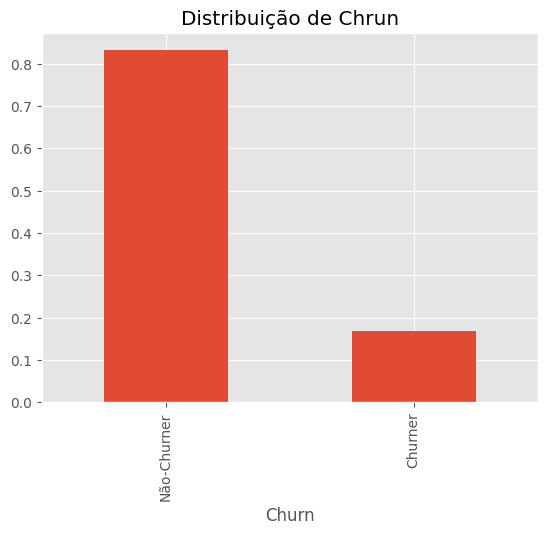

In [6]:
_ = df["Churn"].value_counts(normalize=True).plot.bar()
_ = plt.title("Distribuição de Chrun")
_ = plt.xticks(range(2), ["Não-Churner", "Churner"])

Temos uma base que a quantidade não-churners e churners é disproporsionla, para rodar modelos vamos trabalhar sobre essa questão.

In [5]:
colunas_continuas = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                     'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                     'DaySinceLastOrder', 'CashbackAmount']

colunas_categoricas = ['PreferredLoginDevice', 'CityTier', 'Gender', 'SatisfactionScore',
                       'MaritalStatus', 'Complain', 'PreferredPaymentMode_Cash', 'PreferredPaymentMode_Credit', 
                       'PreferredPaymentMode_Debit', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
                       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
                       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Others']

## **Variáveis continuas**

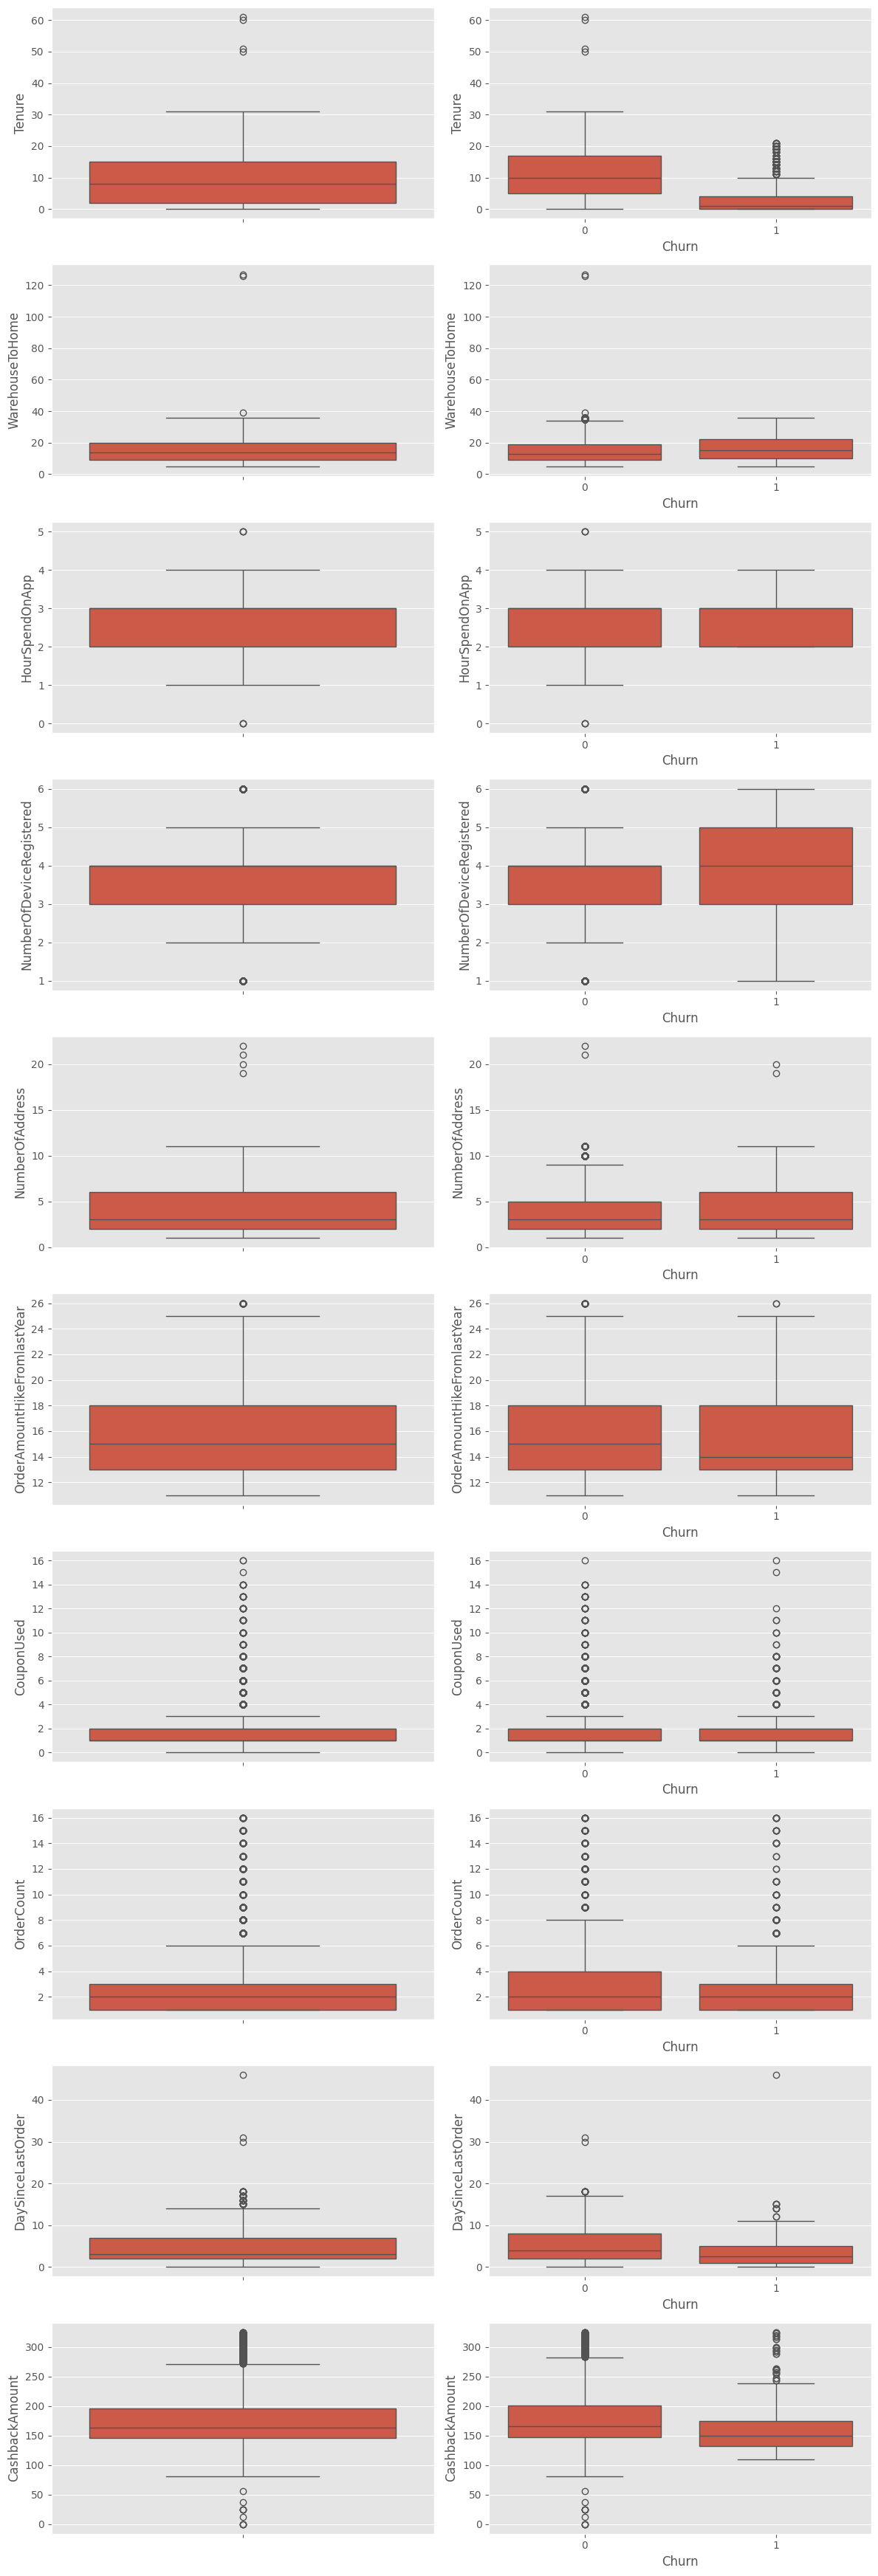

In [8]:
fig, axes = plt.subplots(len(colunas_continuas), 2, figsize=(12, 35))
num = 0

for i in colunas_continuas:
    _ = sns.boxplot(data=df, y=i, ax=axes[num, 0])
    _ = sns.boxplot(data=df, x="Churn", y=i, ax=axes[num, 1])
    num += 1
    _ = fig.tight_layout()

**Tenure**

Quando observamos com a visão de um boxplot, encontramos alguns valores distoantes em relação ao geral dos dados (outliers) e vemos uma diferença gritante entre não-churners e churners. Corrobora com o que tinha sido encontrado na análise anterior de o tempo como cliente ser o indicador usado para probabilidade de ser chruner ou não, abaixo tem um gráfico da análise anterior mostrando essa diferança de uma forma mais simples.

Text(0.5, 0, '')

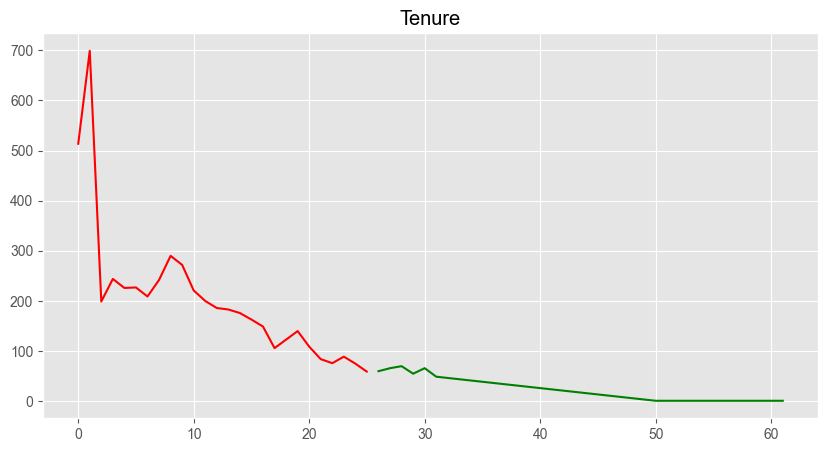

In [9]:
fig, axes = plt.subplots(figsize=(10, 5))

var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 0]
sns.lineplot(x= var.index, y=var.values, color="green")

sns.set_style("whitegrid")
var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 1]
sns.lineplot(x= var.index, y=var.values, color="red")

axes.set_title("Tenure")
axes.set_xlabel("")

**Warehouse to Home**

Filtrando apenas usuários com a distância menos de 40km entre o armázem e o domicílio porque estava difícil enteder o bloxplot, mostrando outliers extremos

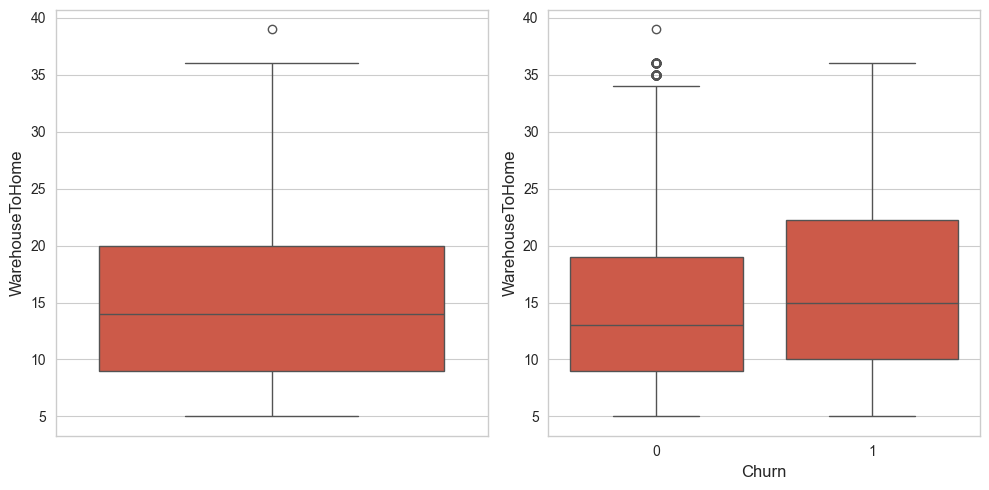

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df[df["WarehouseToHome"] < 40], y="WarehouseToHome", ax=axes[0])
_ = sns.boxplot(data=df[df["WarehouseToHome"] < 40], x="Churn", y="WarehouseToHome", ax=axes[1])

_ = fig.tight_layout()

Parece que não faz sentido manter clientes utilizaram menos de 1h ou mais de 5h o app/site da empresa.
Apenas comparando com o churn, não pacere ser uma métrica que seja tão relevante.

In [11]:
df["HourSpendOnApp"].sort_values().value_counts(sort=False), df["HourSpendOnApp"].sort_values().value_counts(normalize=True, sort=False) * 100

(HourSpendOnApp
 0       3
 1      35
 2    1724
 3    2689
 4    1176
 5       3
 Name: count, dtype: int64,
 HourSpendOnApp
 0     0.053286
 1     0.621670
 2    30.621670
 3    47.761989
 4    20.888099
 5     0.053286
 Name: proportion, dtype: float64)

## **Variáveis Categóricas**

**CityTier**

Essa variável não tinha muitas explicações no Kaggle, mas imagino que seja relacionado ao tamanho da cidade.

Algo como 1 para cidade pequena, 2 para cidade média e 3 para cidade grande. Dentro em uma empresa poderiamos buscar quem sabe responder essa dúvida.

Caso não encontramos um padrõa, o ideal será não utilizar por não saber o que significa.

**SatisfactionScore**

Esse é um ponto curioso, que até onde tenho conhecimento, não parece fazer tanto sentido. Porque alguém daria nota 5 e se tornaria um churner?

Parece que a coluna churn é dada pela probabilidade ser maior de churner estarem antes dos 25 meses com o e-commerce e deixarem de ser depois desse período.

Vou terminar de analisar todas as variáveis para dar proseguimento em alternativas.

**Complain**

Parece que faz sentido crescer o percentual de churners quando existe reclamações, mas não são tantos.

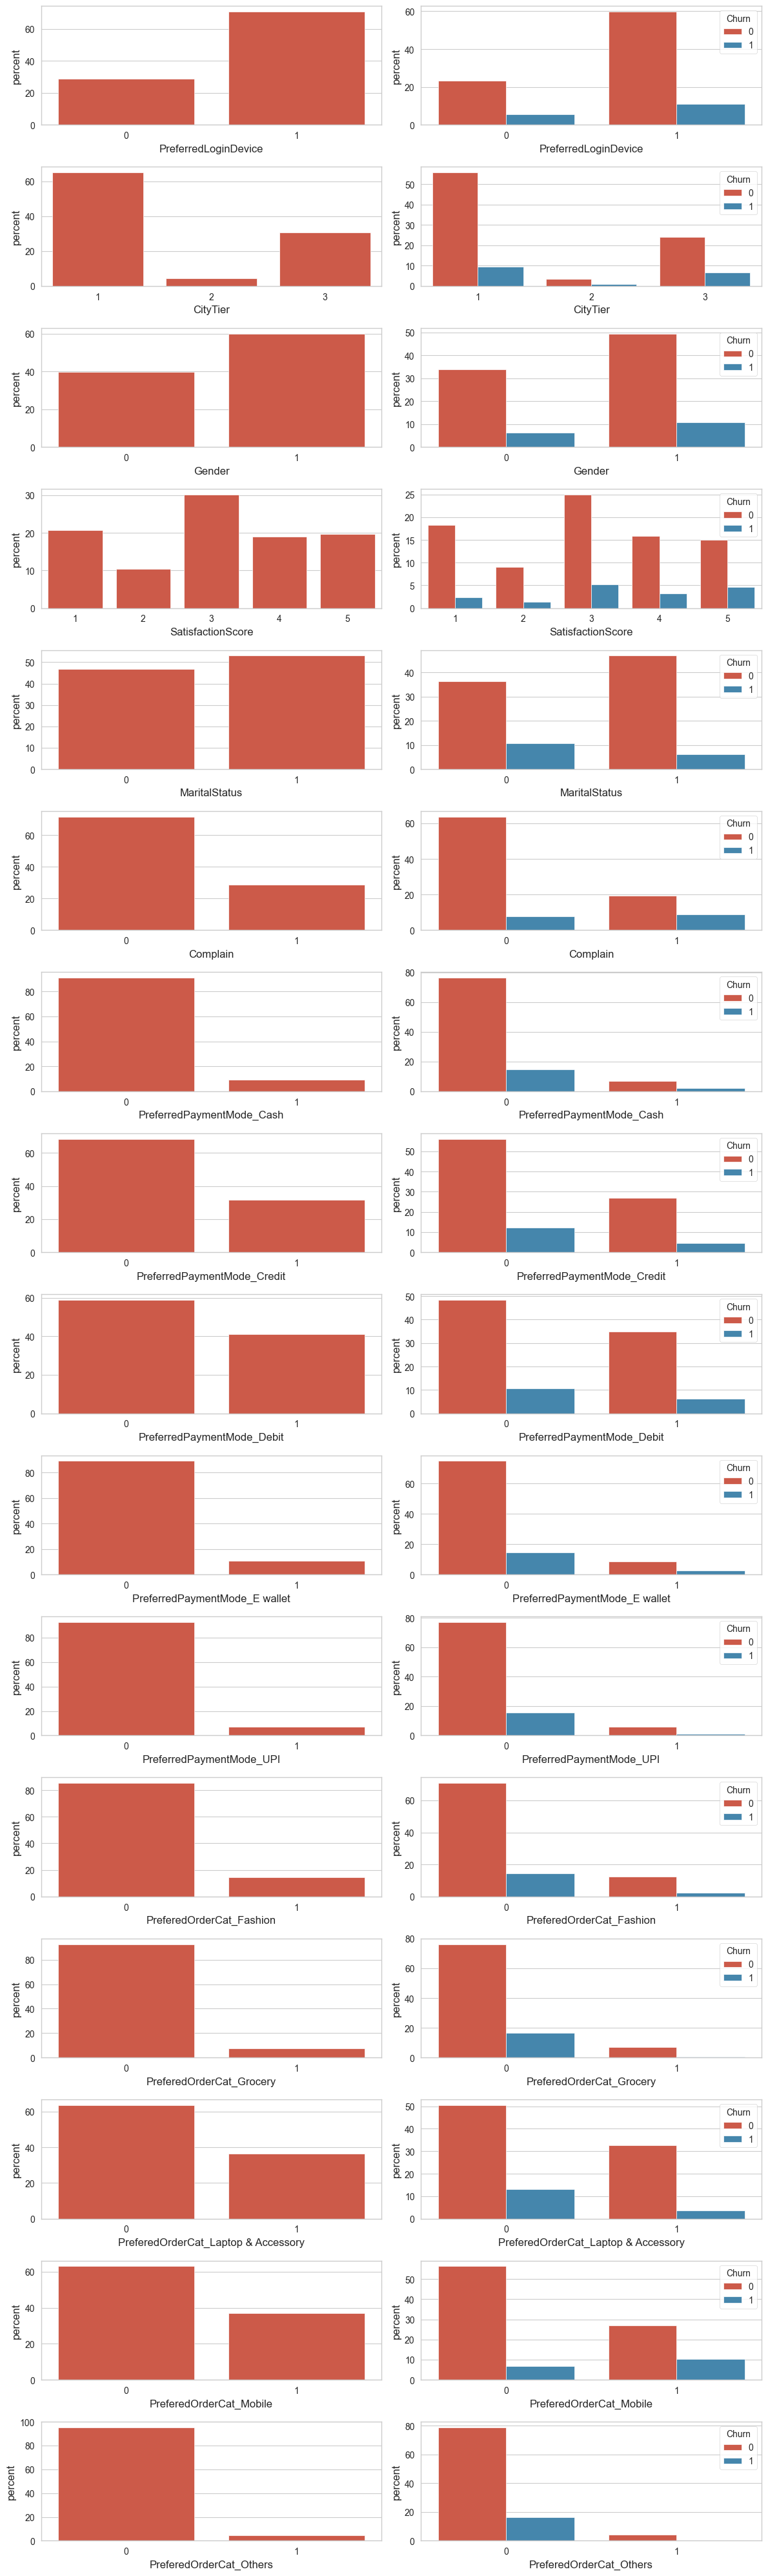

In [12]:
fig, axes = plt.subplots(len(colunas_categoricas), 2, figsize=(12, 40))
num = 0

for i in colunas_categoricas:
    _ = sns.countplot(data=df, x=i, stat="percent", ax=axes[num, 0])
    _ = sns.countplot(data=df, x=i, stat="percent", hue="Churn", ax=axes[num, 1])
    num += 1
    _ = fig.tight_layout()

# **Insights até o momento**

Pacere que as variáveis quando comparadas ao Churn não parecem fazer tanto sentido, talvez o fato dessa variável é dada pelo tempo do cliente com a empresa faça essa distorção nos dados.

Uma possibilidade de atuar é ignorar essa variável e utilizar proxies que tenham nesse dataset para gerar uma nova coluna de churn que tenha mais sentido nesse recorte.

**Variáveis com possíveis outliers**
- Tenure
- WarehouseToHome
- HourSpendOnApp
- NumberOfDeviceRegistered
- NumberOfAddress
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

**Proxies para o modelo**
- SatisfactionScore
- Complain
- OrderCount
- DaySinceLastOrder

# **Outliers, correlação e normalização dos dados**

## **Outliers**

Para remover os outliers para o modelo, vai ser aplicado a técncia baseada na diferença entre o desvio-padrão em relação a média. Vamos apenas considerar os dados que estão dentro de 03 vezes o valor do desvio-padrão em relação a média, fórmulas abaixo:

**Limite Superior = media + (desvio-padrão * 3)** e **Limite Inferior = media - (desvio-padrão * 3)**

Poderiamos utilizar outros formas, como o Intervalo Interquartílico (IQR), mas essa técnica removou muitos dados e poderia gerar outra distorção neles para o modelo baseado em usuários.

In [6]:
df_sem_outliers = df.copy()

for i in colunas_continuas:
    media = df[i].mean()
    desv_pd = df[i].std()

    limite = desv_pd * 3
    abaixo, acima = media - limite, media + limite

    df_sem_outliers = df_sem_outliers[(df_sem_outliers[i] >= abaixo) & (df_sem_outliers[i] <= acima)]

df.shape[0] , df_sem_outliers.shape[0], df.shape[0] - df_sem_outliers.shape[0]

(5630, 5348, 282)

Tivemos apenas 282 observações removidas no tratamento de outliers

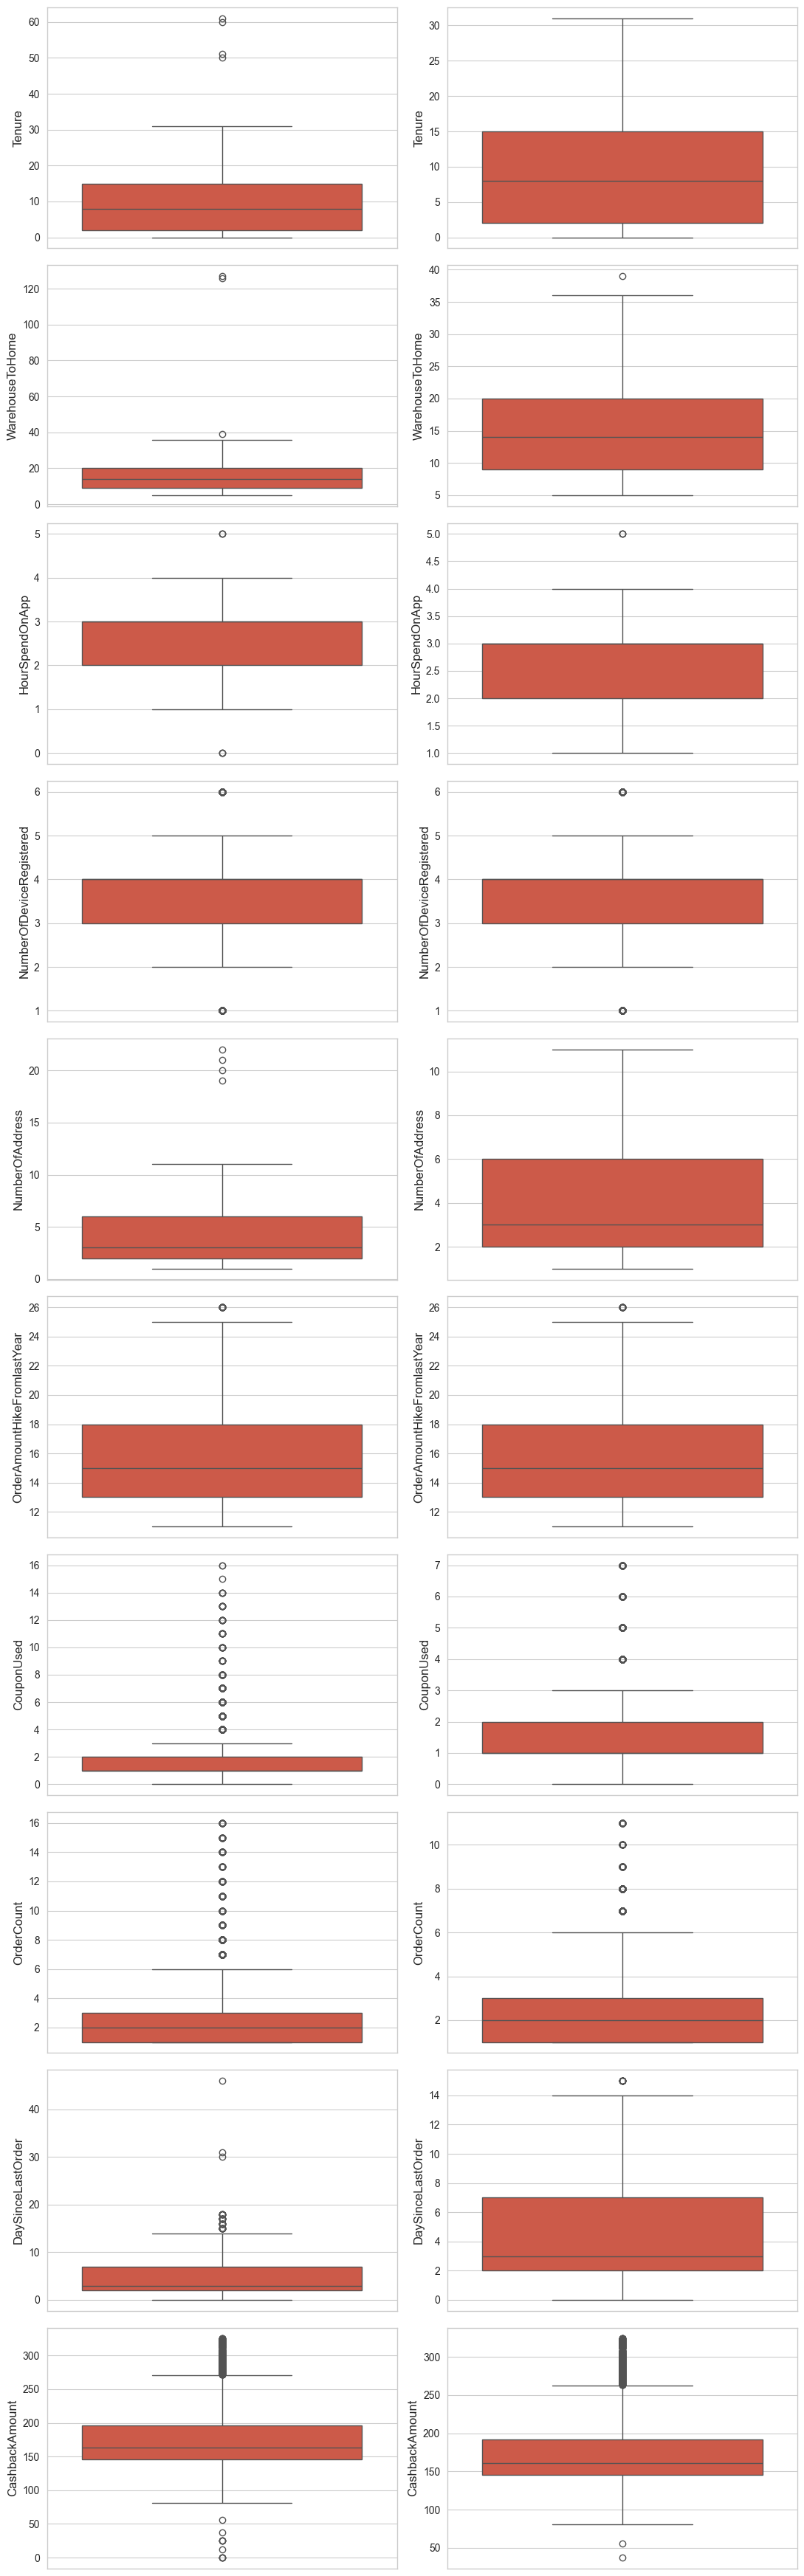

In [14]:
#Gerando novamente os gráficos das variáveis contínuas
fig, axes = plt.subplots(len(colunas_continuas), 2, figsize=(11, 35))
num = 0

for i in colunas_continuas:
    _ = sns.boxplot(data=df, y=i, ax=axes[num, 0])
    _ = sns.boxplot(data=df_sem_outliers, y=i, ax=axes[num, 1])
    num += 1
    _ = fig.tight_layout()

De acordo com os gráficos de caixa, ainda existe "outliers" que poderiam ser removidas, mas vamos manter com base na técnica do desvio-padrão para termos uma avaliação estatística e não perdermos tantos dados.

## **Correlação**

Para a análise de correlação, será utilizado a **correlação de Spearman** porque se torna possível verificar a correlação entre variáveis continuas não normalmente distribuídas e variáveis categóricas dummyzadas sem a necessidade de assumir uma distribuição específica dos dados.

In [24]:
#Removendo do dataset a coluna "CityTier" porque para o contexto da base, não sabemos o que significa
df_sem_outliers.drop(columns="CityTier", inplace=True)

In [54]:
correlation_matrix = pd.DataFrame(index=df_sem_outliers.columns[2:], columns=df_sem_outliers.columns[2:])
p_values_matrix = pd.DataFrame(index=df_sem_outliers.columns[2:], columns=df_sem_outliers.columns[2:])

for i in df_sem_outliers[df_sem_outliers.columns[2:]]:
    for j in df_sem_outliers[df_sem_outliers.columns[2:]]:
        corr, p_value = spearmanr(df[i], df[j])
        correlation_matrix.loc[i, j] = corr
        p_values_matrix.loc[i, j] = p_value

correlation_matrix = correlation_matrix.astype(float)
p_values_matrix = p_values_matrix.astype(float)

In [50]:
df_sem_outliers.columns[2:17]

Index(['Tenure', 'PreferredLoginDevice', 'WarehouseToHome', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [51]:
correlation_matrix = pd.DataFrame(index=df_sem_outliers.columns[2:17], columns=df_sem_outliers.columns[2:17])
p_values_matrix = pd.DataFrame(index=df_sem_outliers.columns[2:17], columns=df_sem_outliers.columns[2:17])

for i in df_sem_outliers[df_sem_outliers.columns[2:17]]:
    for j in df_sem_outliers[df_sem_outliers.columns[2:17]]:
        corr, p_value = spearmanr(df[i], df[j])
        correlation_matrix.loc[i, j] = corr
        p_values_matrix.loc[i, j] = p_value

correlation_matrix = correlation_matrix.astype(float)
p_values_matrix = p_values_matrix.astype(float)

**Matriz de Correlação**

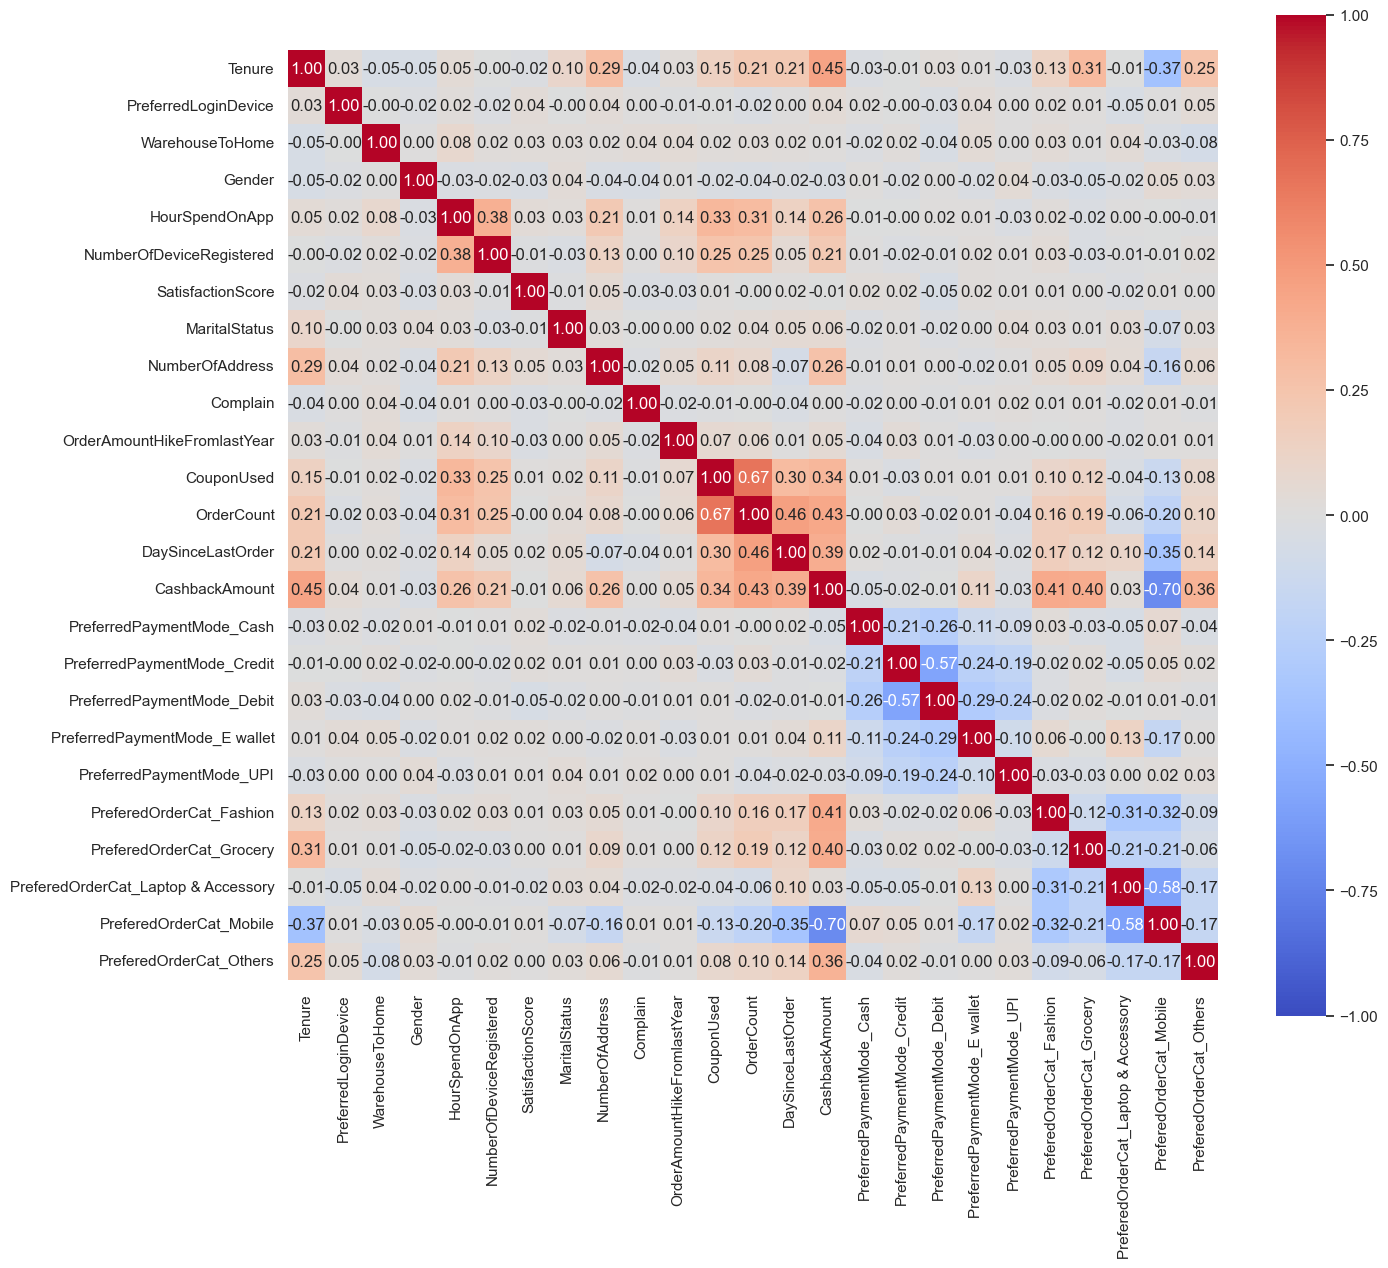

In [55]:
fig, axes = plt.subplots(figsize=(15, 13))

_ = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, 
                annot=True, fmt=".2f", cmap="coolwarm", square= True)

**Matriz de P-valor**

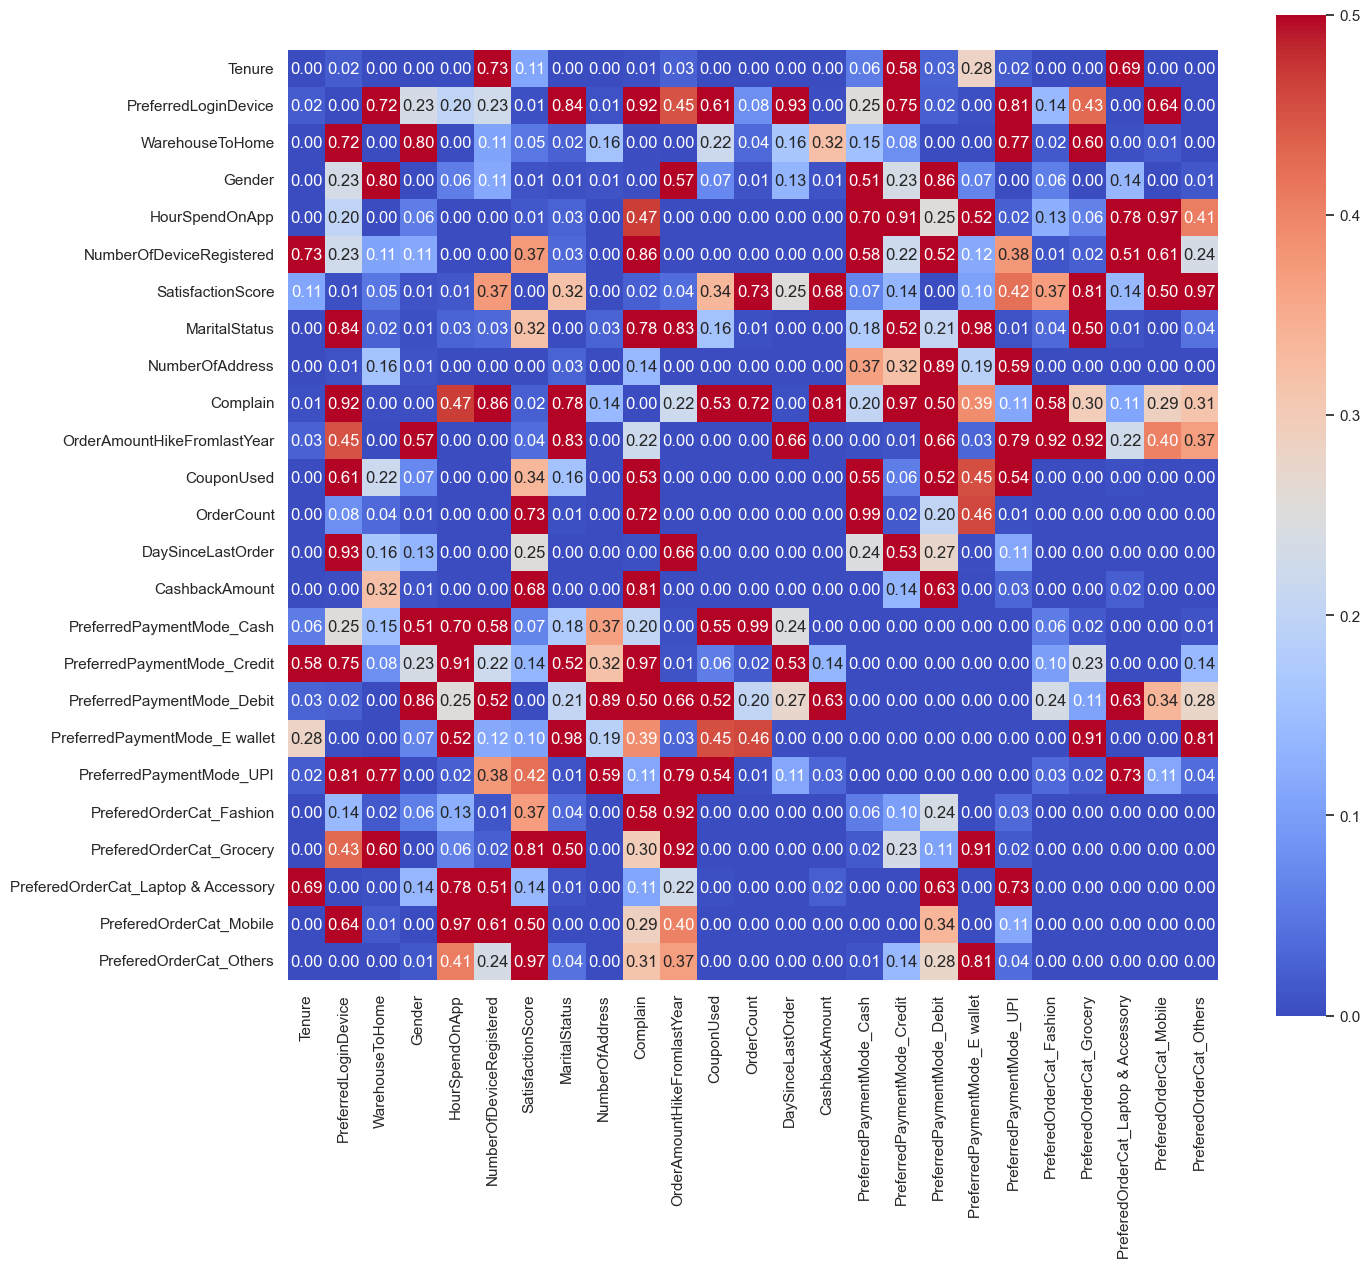

In [56]:
fig, axes = plt.subplots(figsize=(15, 13))

_ = sns.heatmap(p_values_matrix, vmin=0, vmax=0.5, 
                annot=True, fmt=".2f", cmap="coolwarm", square= True)